In [1]:
#GAN DESINGED TO GENERATE IMAGES OF DIFFERENT CLASSES
#HINGE LOSS GAN AND INCREASING THE WIDTH IN EACH LAYER
!git clone https://github.com/huggingface/pytorch-pretrained-BigGAN.git

Cloning into 'pytorch-pretrained-BigGAN'...
remote: Enumerating objects: 71, done.
remote: Total 71 (delta 0), reused 0 (delta 0), pack-reused 71
Receiving objects: 100% (71/71), 334.66 KiB | 20.92 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [2]:
%cd pytorch-pretrained-BigGAN/


/content/pytorch-pretrained-BigGAN


In [3]:
!pip install -r full_requirements.txt

  Preparing metadata (setup.py) ... done
  Created wheel for libsixel-python: filename=libsixel_python-0.5.0-py3-none-any.whl size=12264 sha256=9a2a6c5038f1f02a578c666deb2b979ff3966a1a8f811476d3ba014226d57a8e
  Stored in directory: /root/.cache/pip/wheels/ad/6c/7b/db813d9aa0922435dcf04438be690eb1363b354e3f83a8aa36
Successfully built libsixel-python


In [4]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 13.7 MB/s eta 0:00:00


In [5]:
import torch
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample, save_as_images, convert_to_images)

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
model = BigGAN.from_pretrained('biggan-deep-256')

100%|██████████| 715/715 [00:00<00:00, 976849.30B/s]


In [8]:
!gdown 1cbS0jEZ90mZ2VS4ZDBc9ED8SqiRlqdWy

Downloading...
From: https://drive.google.com/uc?id=1cbS0jEZ90mZ2VS4ZDBc9ED8SqiRlqdWy
To: /content/pytorch-pretrained-BigGAN/biggan_categories.json
100% 29.7k/29.7k [00:00<00:00, 87.6MB/s]


In [9]:
import json
f = open('/content/pytorch-pretrained-BigGAN/biggan_categories.json')
categories = json.load(f)

In [10]:
categories_list = {}
for i, category in enumerate(categories):
  categories_list[i] = category

In [11]:
categories_list

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [12]:
classes = ['castle', 'mushroom', 'hourglass']

In [13]:
class_vector = one_hot_from_names(classes, batch_size=3)
class_vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
len(class_vector[0])

1000

In [15]:
#The smaller the value, the smaller the variety. The higher the value, the greater the variety.

#Truncation can be implemented using random noise sample (z) through the function truncated_noise_sample(batch_size=1, dim_z=128, truncation=1., seed=None). This function creates a truncated noise vector.

#Parameters:

#batch_size: batch size.
#dim_z: dimension of z
#truncation: truncation value
#seed: seed for the random generator
#The output will be an array of shape (batch_size, dim_z)

In [16]:
truncation = 0.5
noise_vector = truncated_noise_sample(truncation = truncation, batch_size = 3)

In [17]:
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

In [18]:
type(noise_vector), type(class_vector)

(torch.Tensor, torch.Tensor)

In [19]:
noise_vector = noise_vector.to('cuda')
class_vector = class_vector.to('cuda')
model.to('cuda')

BigGAN(
  (embeddings): Linear(in_features=1000, out_features=128, bias=False)
  (generator): Generator(
    (gen_z): Linear(in_features=256, out_features=32768, bias=True)
    (layers): ModuleList(
      (0-2): 3 x GenBlock(
        (bn_0): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=2048, bias=False)
          (offset): Linear(in_features=256, out_features=2048, bias=False)
        )
        (conv_0): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1))
        (bn_1): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=512, bias=False)
          (offset): Linear(in_features=256, out_features=512, bias=False)
        )
        (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_2): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=512, bias=False)
          (offset): Linear(in_features=256, out_features=512, bias=False)
        )
        (conv_2): Conv2d(512, 512, kernel_siz

In [20]:
def generate_image(noise_vector, class_vector, truncation):
  with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)
  return output

In [21]:
output = generate_image(noise_vector, class_vector, truncation)

In [22]:
output.shape

torch.Size([3, 3, 256, 256])

In [23]:
output = output.to('cpu')
results = convert_to_images(output)
results

[<PIL.Image.Image image mode=RGB size=256x256>,
 <PIL.Image.Image image mode=RGB size=256x256>,
 <PIL.Image.Image image mode=RGB size=256x256>]

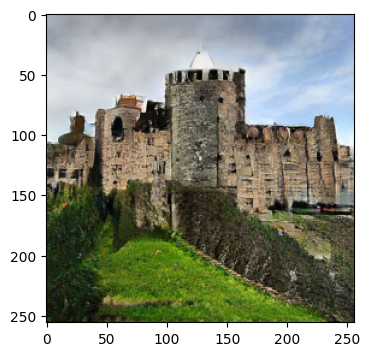

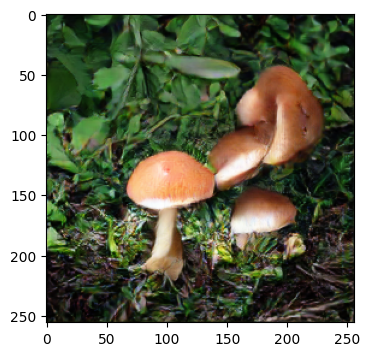

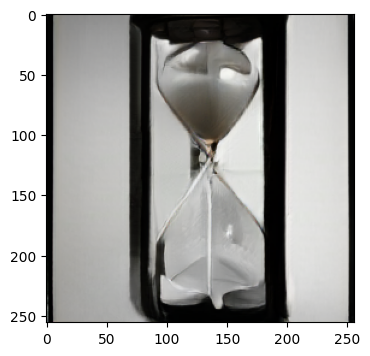

In [24]:
import matplotlib.pyplot as plt

for image in results:
  plt.figure(figsize = (4,4))
  plt.imshow(image)
  plt.show();

In [25]:
import os
os.makedirs('/content/results/', exist_ok = True)
save_as_images(output, '/content/results/result')

In [26]:
def generate_image_biggan(category, seed, truncation=0.7, device='gpu'):
  class_vector = one_hot_from_names(category, batch_size=1)
  noise_vector = truncated_noise_sample(truncation = truncation, batch_size = 1, seed = seed)

  noise_vector = torch.from_numpy(noise_vector)
  class_vector = torch.from_numpy(class_vector)

  if device == 'gpu':
    noise_vector = noise_vector.to('cuda')
    class_vector = class_vector.to('cuda')
    model.to('cuda')

  output = generate_image(noise_vector, class_vector, truncation)

  if device == 'gpu':
    output = output.to('cpu')

  result = convert_to_images(output)

  return result

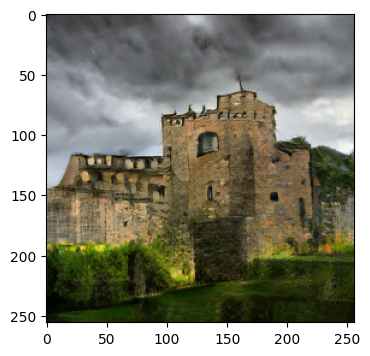

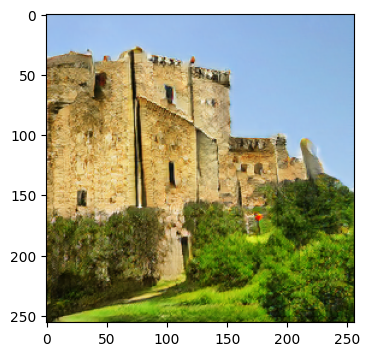

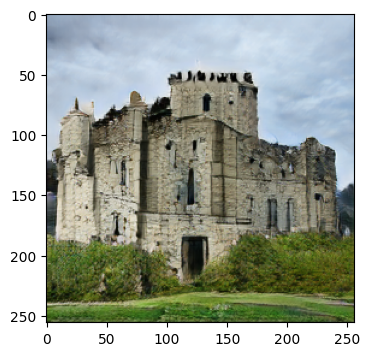

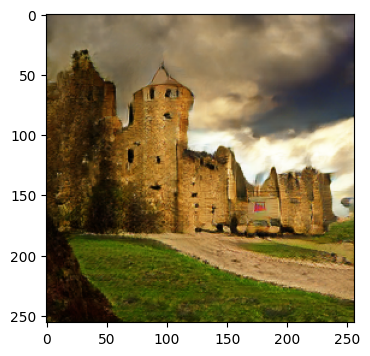

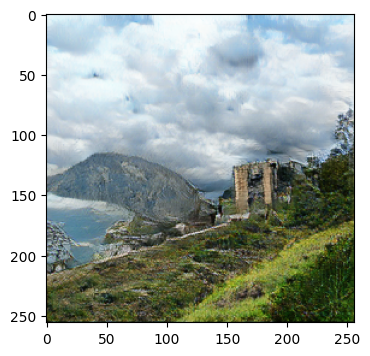

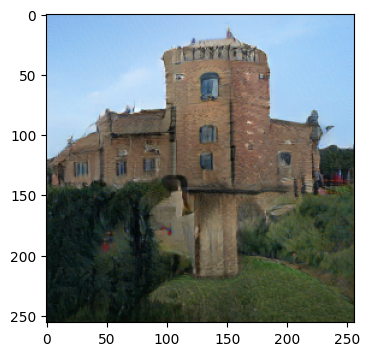

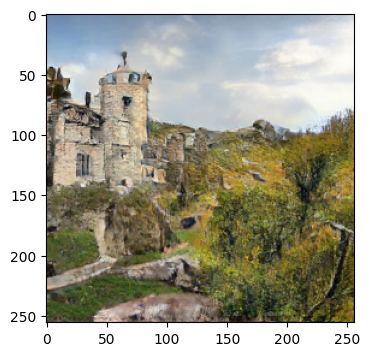

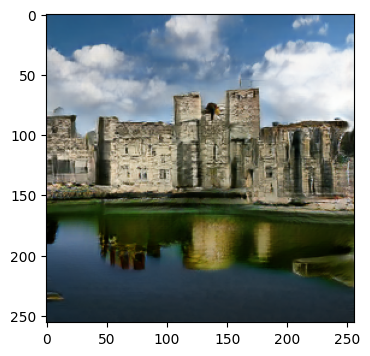

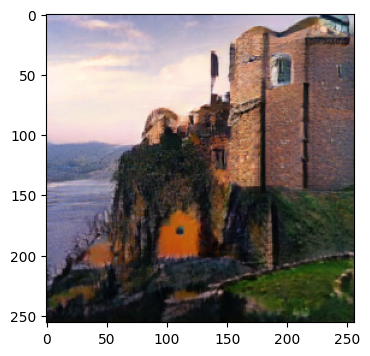

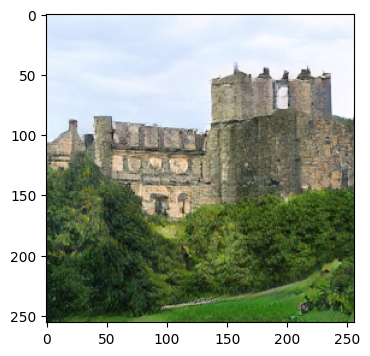

In [27]:
category = 'castle' #@param {type: "string"}
num_samples = 10 #@param {type: "slider", min:1, max:20, step:1}
truncation = 1 #@param {type: "slider", min:0.02, max:1, step:0.02}
seed = 33873 #@param {type: "slider", min: 0, max: 100000, step: 1}

generated_images = []

for i in range(0, num_samples):
  result = generate_image_biggan(category, seed+i, truncation)
  generated_images.append(result[0])

  plt.figure(figsize=(4,4))
  plt.imshow(result[0])
  plt.show();

In [28]:
from PIL import Image
import cv2
import numpy as np
from math import ceil
from google.colab.patches import cv2_imshow

def show_images_grid(images, scale=0.25, rows=1):
   w, h = images[0].size
   w = int(w*scale)
   h = int(h*scale)
   height = rows*h
   cols = ceil(len(images) / rows)
   width = cols*w
   grid = Image.new('RGBA', (width,height), 'white')
   for i, img in enumerate(images):
     img = img.resize((w,h), Image.ANTIALIAS)
     grid.paste(img, (w*(i % cols), h*(i // cols)))

   grid = np.array(grid)
   return grid

def show_full_image(image):
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  return cv2_imshow(image)

<ipython-input-28-580d2f889a11>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((w,h), Image.ANTIALIAS)


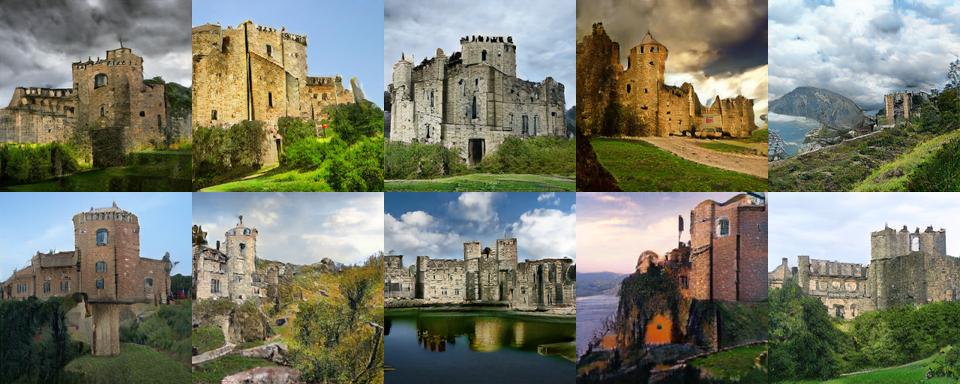

In [29]:
#Discriminator only used when training the architecture
grid_images = show_images_grid(generated_images, scale=0.75, rows=2)
show_full_image(grid_images)

<ipython-input-28-580d2f889a11>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((w,h), Image.ANTIALIAS)


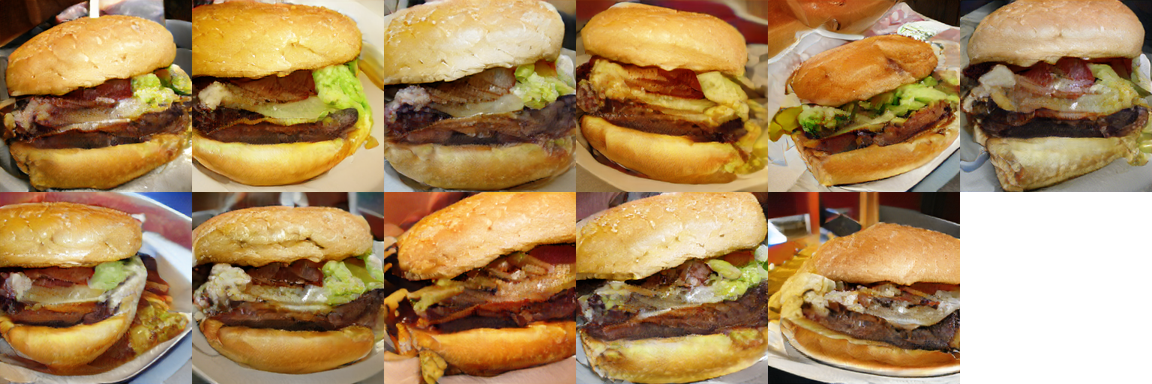

In [31]:
category = 'cheeseburger'   #@param {type:"string"}
num_samples = 11   #@param {type:"slider", min:1, max:20, step:1}
truncation = 0.7    #@param {type:"slider", min:0.02, max:1, step:0.02}
seed = 33873  #@param {type:"slider", min:0, max:100000, step:1}

generated_images = []

for i in range(0, num_samples):

  result = generate_image_biggan(category, seed+i, truncation)
  generated_images.append(result[0])

grid_images = show_images_grid(generated_images, scale=0.75, rows=2)
show_full_image(grid_images)

<ipython-input-28-580d2f889a11>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((w,h), Image.ANTIALIAS)


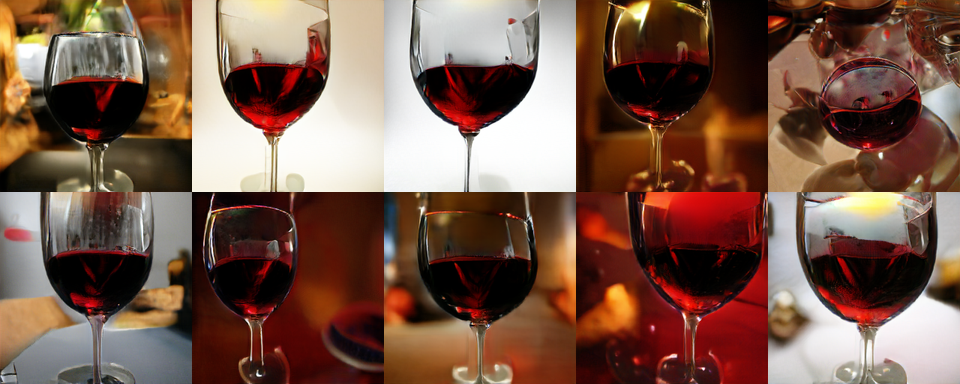

In [33]:
category = 'red wine'   #@param {type:"string"}
num_samples = 10   #@param {type:"slider", min:1, max:20, step:1}
truncation = 0.62    #@param {type:"slider", min:0.02, max:1, step:0.02}
seed = 33873  #@param {type:"slider", min:0, max:100000, step:1}

generated_images = []

for i in range(0, num_samples):

  result = generate_image_biggan(category, seed+i, truncation)
  generated_images.append(result[0])

grid_images = show_images_grid(generated_images, scale=0.75, rows=2)
show_full_image(grid_images)